In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

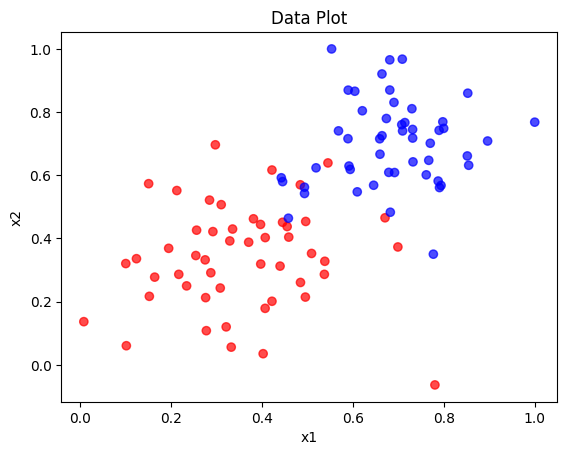

In [2]:
data = pd.read_csv("data.csv")
X = data[['x1', 'x2']].values
y = data['label'].values
    
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Data Plot")
plt.show()

In [3]:
def predict(x, weights, bias):
    return 1 if np.dot(weights, x) + bias > 0 else 0

In [4]:
def plot_decision_boundary(weights, bias, color='k', linestyle='-'):
    x_vals = np.linspace(-1, 1, 100)
    y_vals = -(weights[0] * x_vals + bias) / weights[1]
    plt.plot(x_vals, y_vals, color=color, linestyle=linestyle)

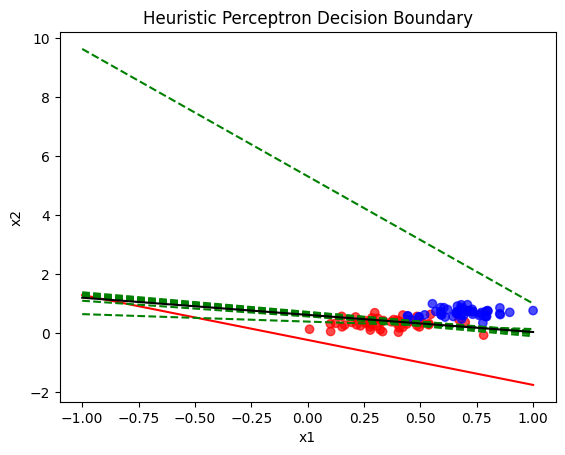

Learning Rate: 0.1
Heuristic Perceptron Weights: [-0.57752512 -0.9942194 ]
Heuristic Perceptron Bias: 0.619111465028212


In [5]:
def train_perceptron_heuristic(X, y, learning_rate=0.1, epochs=50):
    np.random.seed(999) 
    weights = np.random.rand(2)
    bias = np.random.rand(1)[0]
    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
    plot_decision_boundary(weights, bias, color='r')
    
    for epoch in range(epochs):
        for i in range(len(X)):
            x_i = X[i]
            y_i = y[i]
            y_pred = predict(x_i, weights, bias)
            error = y_i - y_pred
            if error != 0:
                weights += learning_rate * error * x_i
                bias += learning_rate * error
        if epoch % 10 == 0:
            plot_decision_boundary(weights, bias, color='g', linestyle='--')

    plot_decision_boundary(weights, bias, color='k')
    plt.title("Heuristic Perceptron Decision Boundary")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()
    return weights, bias

weights_heuristic, bias_heuristic = train_perceptron_heuristic(X, y, 
learning_rate=0.1, epochs=100)
print("Learning Rate: 0.1")
print("Heuristic Perceptron Weights:", weights_heuristic)
print("Heuristic Perceptron Bias:", bias_heuristic)

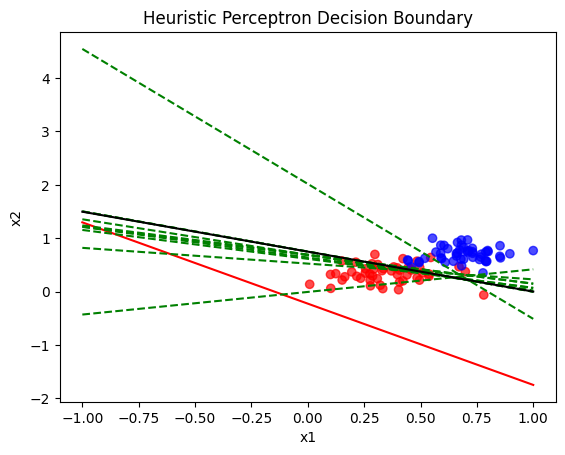

Learning Rate: 0.01
Heuristic Perceptron Weights: [-0.07909933 -0.10569938]
Heuristic Perceptron Bias: 0.07911146502821205


In [6]:
weights_heuristic, bias_heuristic = train_perceptron_heuristic(X, y, 
learning_rate=0.01, epochs=100)
print("Learning Rate: 0.01")
print("Heuristic Perceptron Weights:", weights_heuristic)
print("Heuristic Perceptron Bias:", bias_heuristic)

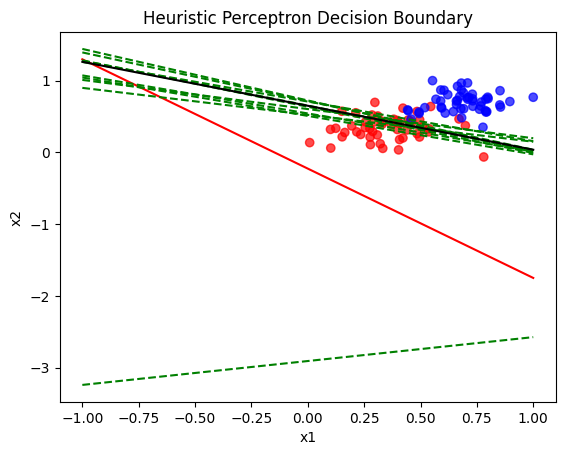

Learning Rate: 0.5
Heuristic Perceptron Weights: [-2.94061196 -4.8014662 ]
Heuristic Perceptron Bias: 3.1191114650282117


In [7]:
weights_heuristic, bias_heuristic = train_perceptron_heuristic(X, y, 
learning_rate=0.5, epochs=100)
print("Learning Rate: 0.5")
print("Heuristic Perceptron Weights:", weights_heuristic)
print("Heuristic Perceptron Bias:", bias_heuristic)

Epoch 0: Weights = [ 0.32622244 -0.26930574], Bias = -0.16777431920698774
Epoch 10: Weights = [-0.17779956 -0.53399274], Bias = 0.23222568079301228
Epoch 20: Weights = [-0.22011156 -0.57966774], Bias = 0.3322256807930123
Epoch 30: Weights = [-0.31616056 -0.64640674], Bias = 0.43222568079301227
Epoch 40: Weights = [-0.44053156 -0.67052774], Bias = 0.43222568079301227
Epoch 50: Weights = [-0.39904756 -0.81860074], Bias = 0.43222568079301227
Epoch 60: Weights = [-0.47370156 -0.75960874], Bias = 0.5322256807930122
Epoch 70: Weights = [-0.55441456 -0.77880874], Bias = 0.5322256807930122
Epoch 80: Weights = [-0.50171056 -0.89967274], Bias = 0.5322256807930122
Epoch 90: Weights = [-0.50762156 -0.90075274], Bias = 0.6322256807930122


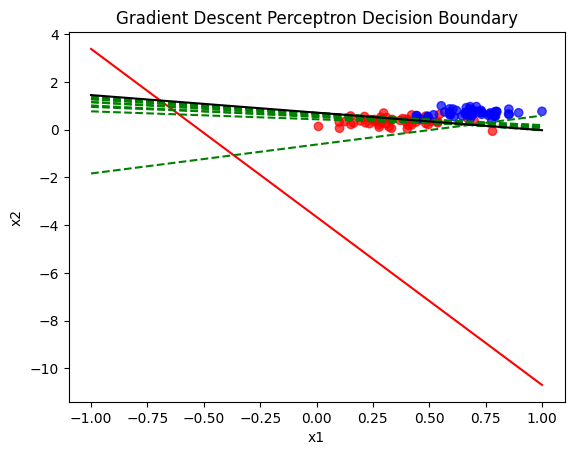

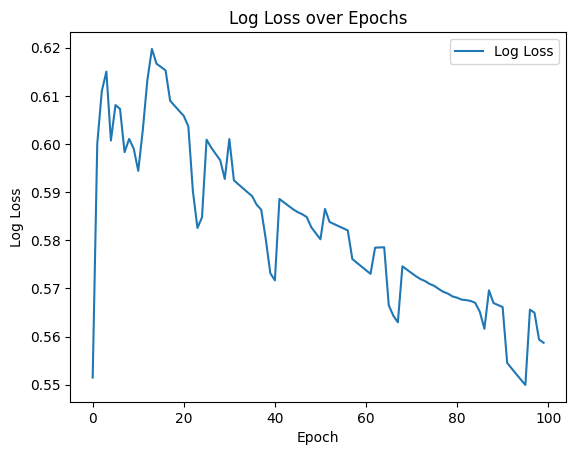

In [8]:
def gradient_descent_perceptron(X, y, learning_rate=0.1, epochs=50):
    weights = np.random.rand(2)
    bias = np.random.rand(1)[0]
    history = []
    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
    plot_decision_boundary(weights, bias, color='r')
    
    for epoch in range(epochs):
        total_loss = 0
        for i in range(len(X)):
            x_i = X[i]
            y_i = y[i]
            y_pred = predict(x_i, weights, bias)
            y_prob = 1 / (1 + np.exp(-np.dot(weights, x_i) - bias))
            total_loss += - (y_i * np.log(y_prob) + (1 - y_i) * np.log(1 - y_prob))
            
            if y_pred != y_i:
                if y_pred == 0:
                    bias += learning_rate
                    weights += learning_rate * x_i
                else:
                    bias -= learning_rate
                    weights -= learning_rate * x_i
        

        history.append(total_loss / len(X))
        
        if epoch % 10 == 0:
            print(f"Epoch {epoch}: Weights = {weights}, Bias = {bias}")
        
        if epoch % 10 == 0:
            plot_decision_boundary(weights, bias, color='g', linestyle='--')
    
    plot_decision_boundary(weights, bias, color='k')
    plt.title("Gradient Descent Perceptron Decision Boundary")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()
    
    plt.plot(range(epochs), history, label="Log Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Log Loss")
    plt.title("Log Loss over Epochs")
    plt.legend()
    plt.show()
    
    return weights, bias, history

weights_gradient, bias_gradient, history = gradient_descent_perceptron(X, y,
learning_rate=0.1, epochs=100)

Epoch 0: Weights = [-0.00026955 -0.14794579], Bias = 0.20732423010210543
Epoch 10: Weights = [-0.09580405 -0.17891189], Bias = 0.11732423010210537
Epoch 20: Weights = [-0.10478105 -0.17107089], Bias = 0.11732423010210537
Epoch 30: Weights = [-0.11455825 -0.16664409], Bias = 0.11732423010210537
Epoch 40: Weights = [-0.12939255 -0.15382229], Bias = 0.11732423010210537
Epoch 50: Weights = [-0.12285545 -0.15022559], Bias = 0.12732423010210536
Epoch 60: Weights = [-0.12340225 -0.15008309], Bias = 0.12732423010210536
Epoch 70: Weights = [-0.12394905 -0.14994059], Bias = 0.12732423010210536
Epoch 80: Weights = [-0.12262785 -0.15106379], Bias = 0.12732423010210536
Epoch 90: Weights = [-0.12504265 -0.14965559], Bias = 0.12732423010210536


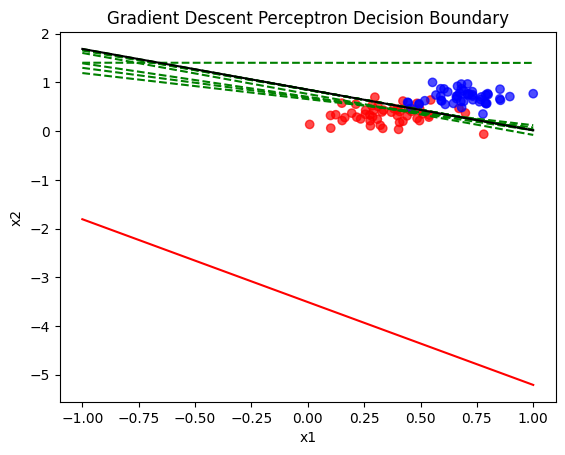

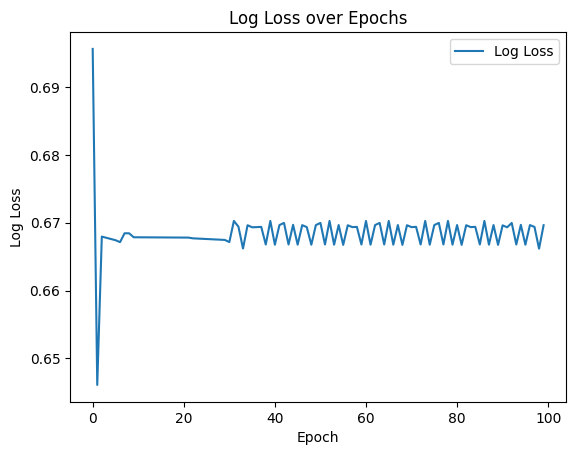

In [11]:
weights_gradient, bias_gradient, history = gradient_descent_perceptron(X, 
y, learning_rate=0.01, epochs=100)

Epoch 0: Weights = [-0.00513706 -0.04065031], Bias = -0.8681096471053907
Epoch 10: Weights = [-0.79647206 -2.31704331], Bias = 1.1318903528946094
Epoch 20: Weights = [-1.80419706 -2.86075331], Bias = 1.6318903528946094
Epoch 30: Weights = [-1.81938706 -3.24138331], Bias = 2.1318903528946094
Epoch 40: Weights = [-2.14420706 -3.77780331], Bias = 2.1318903528946094
Epoch 50: Weights = [-2.44467706 -3.67463831], Bias = 2.6318903528946094
Epoch 60: Weights = [-2.56121206 -4.13920831], Bias = 2.6318903528946094
Epoch 70: Weights = [-2.30273206 -4.67108331], Bias = 2.63189035289461
Epoch 80: Weights = [-2.77115206 -4.46981831], Bias = 3.13189035289461
Epoch 90: Weights = [-2.98982206 -4.75662831], Bias = 3.13189035289461


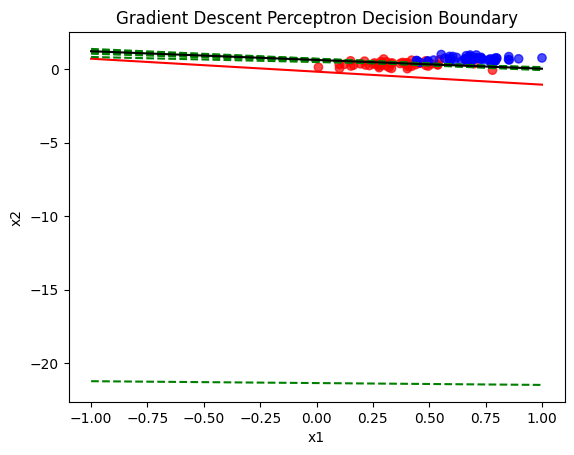

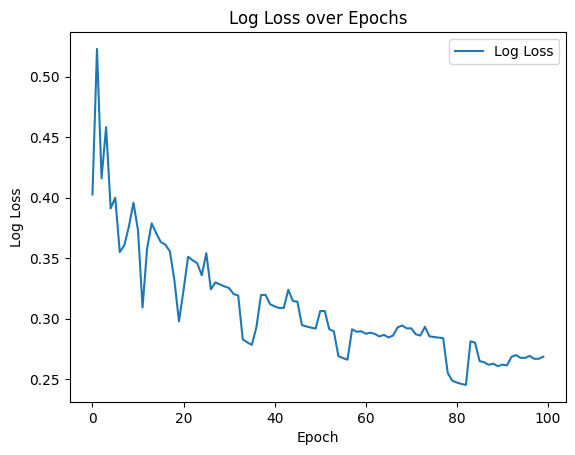

In [10]:
weights_gradient, bias_gradient, history = gradient_descent_perceptron(X,
y, learning_rate=0.5, epochs=100)